In this notebook we will be training three autoencoders and test the autoencoder-transformed data on CNN-LSTM. Please use the table of contents on the left panel to navigate between sections.<br>

Performance summary: <br>
The MLP AE yielded a test accuracy of 24.14%, an AUROC of 0.645, and an F1 score of 0.244. <br>
The LSTM AE yielded a test accuracy of 15.52%, an AUROC of 0.543, and an F1 score of 0.104. <br>
The CAE yielded a test accuracy of 27.01%, an AUROC of 0.650, and an F1 score of 0.263.

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading data

In [ ]:
# read one-hot-encoding data (see data_processing.ipyb for detail )
X_train_ohe=np.load("/gdrive/My Drive/non_split_data/X_train_ohe.npy")
X_test_ohe=np.load("/gdrive/My Drive/non_split_data/X_test_ohe.npy")
X_val_ohe=np.load("/gdrive/My Drive/non_split_data/X_val_ohe.npy")

y_train_ohe=np.load("/gdrive/My Drive/non_split_data/y_train_ohe.npy")
y_test_ohe=np.load("/gdrive/My Drive/non_split_data/y_test_ohe.npy")
y_val_ohe=np.load("/gdrive/My Drive/non_split_data/y_val_ohe.npy")

In [ ]:
# read integer-processed data
X_test = np.load("/gdrive/My Drive/non_split_data/X_test.npy")
X_train = np.load("/gdrive/My Drive/non_split_data/X_train.npy")
X_val = np.load("/gdrive/My Drive/non_split_data/X_val.npy")

y_test = np.load("/gdrive/My Drive/non_split_data/y_test.npy")
y_train = np.load("/gdrive/My Drive/non_split_data/y_train.npy")
y_val = np.load("/gdrive/My Drive/non_split_data/y_val.npy")

In [ ]:
# read truncted data where the data is truncated at ~500 nt near the 3' end of the RNA sequence 
X_test_split = np.load("/gdrive/My Drive/split data/X_test_split.npy")
X_train_split = np.load("/gdrive/My Drive/split data/X_train_split.npy")
X_val_split = np.load("/gdrive/My Drive/split data/X_val_split.npy")

y_test_split = np.load("/gdrive/My Drive/split data/y_test_split.npy")
y_train_split = np.load("/gdrive/My Drive/split data/y_train_split.npy")
y_val_split = np.load("/gdrive/My Drive/split data/y_val_split.npy")

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(1392, 4000) (174, 4000) (174, 4000)


In [ ]:
print(X_train_split.shape, X_val.shape, X_test.shape)

(5568, 500) (174, 4000) (174, 4000)


# Autoencoder model 1: MLP autoencoder 

Results: MLP autoencoder produces a accuracy of about 1.0 steadily throughout training, which is the expected result for any autoencoder models because the input and the output is the same. By using the MLP autoencoder-transformed data, we evntuallty reached a 24.14% accuracy for the CNN-LSTM model, which is the highest accuracy we can generate, it is also higher than the CNN-LSTM model with un-processed data as input. 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

# define encoder
encoder_input = Input(shape=(4000, 5))
# encoder level 1
encoder = Dense(20)(encoder_input)
encoder = BatchNormalization()(encoder)
encoder = LeakyReLU()(encoder)
# encoder level 2
encoder = Dense(10)(encoder)
encoder = BatchNormalization()(encoder)
encoder = LeakyReLU()(encoder)
# bottleneck 
n_bottleneck = 5
bottleneck = Dense(n_bottleneck)(encoder)

In [ ]:
# define decoder, level 1
decoder = Dense(10)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(20)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# output layer
decoder_output = Dense(5, activation='sigmoid')(decoder)
# define autoencoder model
model = Model(inputs=encoder_input, outputs=decoder_output)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

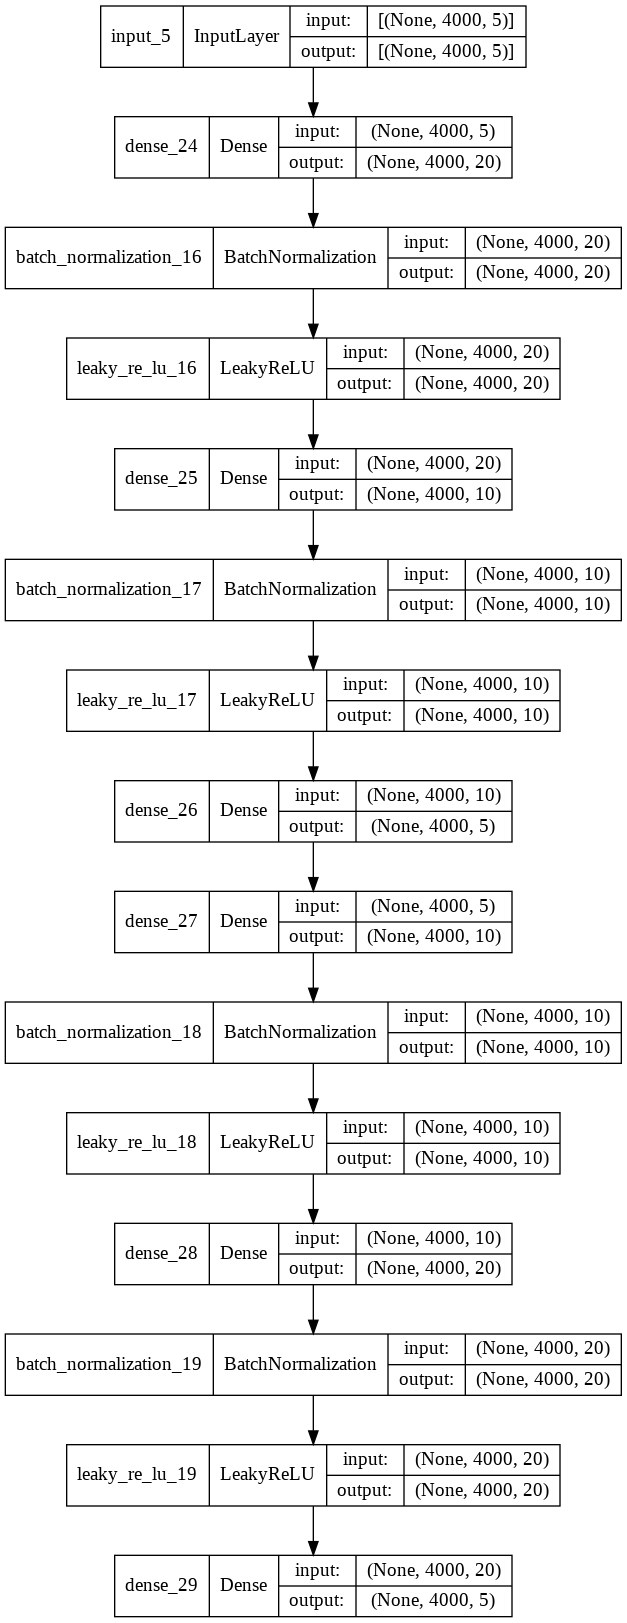

In [ ]:
plot_model(model, 'autoencoder_MLP.png', show_shapes=True)

In [ ]:
history = model.fit(X_train_ohe, X_train_ohe, epochs=50, batch_size= 16, verbose=2, validation_data=(X_val_ohe,X_val_ohe))

Epoch 1/50
87/87 - 3s - loss: 0.5701 - accuracy: 0.9221 - val_loss: 1.3742 - val_accuracy: 0.8316 - 3s/epoch - 39ms/step
Epoch 2/50
87/87 - 1s - loss: 0.1239 - accuracy: 1.0000 - val_loss: 0.9601 - val_accuracy: 1.0000 - 1s/epoch - 17ms/step
Epoch 3/50
87/87 - 1s - loss: 0.0466 - accuracy: 1.0000 - val_loss: 0.4680 - val_accuracy: 1.0000 - 1s/epoch - 17ms/step
Epoch 4/50
87/87 - 2s - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 1.0000 - 2s/epoch - 18ms/step
Epoch 5/50
87/87 - 2s - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 1.0000 - 2s/epoch - 17ms/step
Epoch 6/50
87/87 - 2s - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 1.0000 - 2s/epoch - 17ms/step
Epoch 7/50
87/87 - 1s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000 - 1s/epoch - 17ms/step
Epoch 8/50
87/87 - 2s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000 - 2s/epoch - 17ms/step
Epoch 9/50
87/87 - 1s - loss: 0.

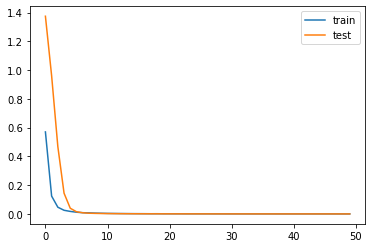

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# We save the encoder part of the model and then we'll use the encoder to generate the latent representation of the raw data 
encoder = Model(inputs=encoder_input, outputs=bottleneck)

In [ ]:
# Now we can encode the data into a compressed version
X_train_encode = encoder.predict(X_train_ohe)
X_test_encode = encoder.predict(X_test_ohe)
X_val_encode = encoder.predict(X_val_ohe)

In [ ]:
# Save the model
encoder.save('encoder_default.h5')

# Test MLP autoencoder-transformed data on CNN-LSTM model 

In [ ]:
from keras.models import load_model

model_1 = load_model('CNN_LSTM_trail1.h5')

history_1=np.load('history_CNN_LSTM_trail1.npy',allow_pickle='TRUE').item()

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout, Conv1D, LeakyReLU
from keras.layers import Input, LSTM
from keras.models import Model

# defining the structure of the CNN-LSTM model
def network_CNN_LSTM(X_train,y_train):
    im_shape=(4000,5)
    inputs_cnn_lstm=Input(shape=(im_shape), name='inputs_cnn_lstm')
    
    conv1_1=Convolution1D(32, 6, activation='relu', input_shape=im_shape)(inputs_cnn_lstm)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    drop = Dropout(0.2)
    conv2_1=Convolution1D(16, 3, activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    drop = Dropout(0.2)
    lstm = (LSTM(units=64, name='lstm'))(pool2)
    flatten=Flatten()(lstm)
    dense_end1 = Dense(32, activation='relu')(flatten)
    drop = Dropout(0.2)
    dense_end2 = Dense(16, activation='relu')(dense_end1)
    main_output = Dense(7, activation='softmax', name='main_output')(dense_end2)

    model = Model(inputs=inputs_cnn_lstm, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    return(model)

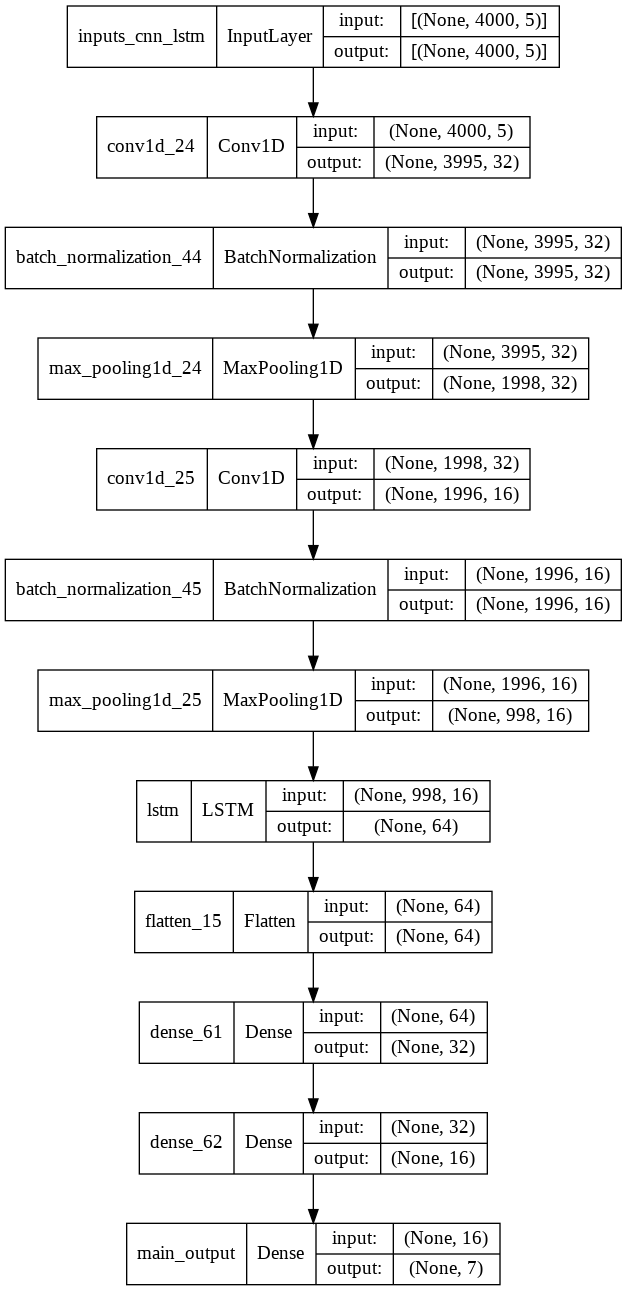

In [ ]:
model_1=network_CNN_LSTM(X_train_encode,y_train_ohe)
plot_model(model_1, 'CNN-LSTM.png', show_shapes=True)

In [ ]:
history_1 = model_1.fit(X_train_encode,y_train_ohe,epochs=70, batch_size=32, validation_data=(X_val_encode,y_val_ohe))

Epoch 1/70
44/44 [==============================] - 7s 169ms/step - loss: 1.6059 - accuracy: 0.3312 - val_loss: 1.8712 - val_accuracy: 0.2586
Epoch 2/70
44/44 [==============================] - 7s 152ms/step - loss: 1.5636 - accuracy: 0.3491 - val_loss: 1.8907 - val_accuracy: 0.2299
Epoch 3/70
44/44 [==============================] - 6s 140ms/step - loss: 1.4951 - accuracy: 0.3649 - val_loss: 1.9201 - val_accuracy: 0.2586
Epoch 4/70
44/44 [==============================] - 6s 139ms/step - loss: 1.4620 - accuracy: 0.3836 - val_loss: 1.9433 - val_accuracy: 0.2356
Epoch 5/70
44/44 [==============================] - 6s 138ms/step - loss: 1.4143 - accuracy: 0.4138 - val_loss: 1.9840 - val_accuracy: 0.2356
Epoch 6/70
44/44 [==============================] - 6s 138ms/step - loss: 1.3888 - accuracy: 0.4159 - val_loss: 1.9465 - val_accuracy: 0.2184
Epoch 7/70
44/44 [==============================] - 6s 138ms/step - loss: 1.3507 - accuracy: 0.4195 - val_loss: 2.1176 - val_accuracy: 0.2471
Epoch 

In [ ]:
model.save('CNN_LSTM_trail1.h5')

In [ ]:
np.save('history_CNN_LSTM_trail1.npy', history)

INFO:tensorflow:Assets written to: ram://f364795b-2191-439f-be7f-c0c7d15632d2/assets


INFO:tensorflow:Assets written to: ram://f364795b-2191-439f-be7f-c0c7d15632d2/assets


In [ ]:
# Evaluation function
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['1','2', '3']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

## Accuracy

Accuracy: 24.14%


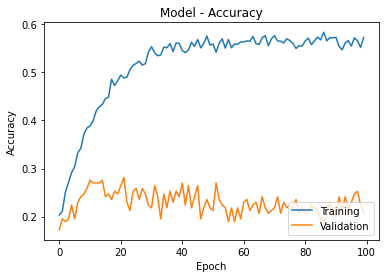

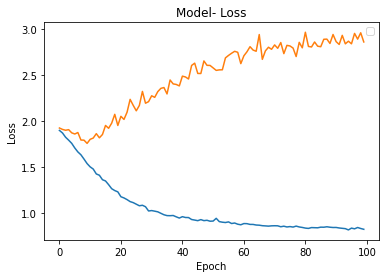

In [ ]:
# plot accuracy and loss
evaluate_model(history_1, X_test_encode, y_test_ohe, model_1)
y_pred=model_1.predict(X_test_encode)

## AUCROC Score

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_ohe, y_pred, multi_class='ovo', average='weighted')

0.6447332630102725

## Confusion Matrix and F1 Score

In [ ]:
# convert the probabilities for each of the 7 classes in y_pred to the class with the highest proba
index = 0
y_pred_ = []

for i in y_pred:
  y_pred_.append(np.argmax(i))
  index+=1

'Cytoplasm' = 0, 'Cytosol' = 1, 'Nucleus' = 2, 'Ribosome' = 3, 'chromatin' = 4, 'nucleolus' = 5, 'nucleoplasm' = 6

The i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class. True values corresponds to the y-axis, prediction corresponds to the x-axis.

In [ ]:
cm = confusion_matrix(y_test, y_pred_)
cm

array([[10,  3,  5,  1,  0,  0,  3],
       [ 0,  9,  3,  1,  3,  3,  3],
       [ 2,  0,  9,  1,  3,  4,  2],
       [ 2,  4,  2,  7,  1,  4,  6],
       [ 0,  6,  1,  3,  5,  4, 11],
       [ 0,  2,  4,  1,  6,  2,  6],
       [ 1,  5,  5,  4, 11,  6,  0]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_, average='weighted')

0.24415610183203953

# Autoencoder model 2: LSTM autoencoder(Encoder-Decoder LSTM Models)


In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [ ]:
from keras import Model
from keras.layers import Layer
import keras.backend as K

# define an attention model --> emphasize the ~400nt region at 3' end 
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector, Bidirectional
from keras.layers import TimeDistributed
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Bidirectional(LSTM(20, activation='relu', input_shape=(4000,5), return_sequences=True)))
# model.add(LSTM(15, activation='relu', return_sequences=True))
model.add(attention())
model.add(RepeatVector(4000))
# model.add(LSTM(15, activation='relu', return_sequences=True))
model.add(Bidirectional(LSTM(20, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(5)))
model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])
# plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')


In [ ]:
model.fit(X_train_ohe, X_train_ohe, epochs=10, batch_size=256, verbose=2)


Epoch 1/10
6/6 - 231s - loss: 0.2036 - accuracy: 0.1731 - 231s/epoch - 39s/step
Epoch 2/10
6/6 - 223s - loss: 0.1733 - accuracy: 0.1730 - 223s/epoch - 37s/step
Epoch 3/10
6/6 - 219s - loss: 0.1542 - accuracy: 0.4443 - 219s/epoch - 37s/step
Epoch 4/10
6/6 - 221s - loss: 0.1424 - accuracy: 0.4947 - 221s/epoch - 37s/step
Epoch 5/10
6/6 - 216s - loss: 0.1333 - accuracy: 0.4960 - 216s/epoch - 36s/step
Epoch 6/10
6/6 - 216s - loss: 0.1246 - accuracy: 0.4964 - 216s/epoch - 36s/step
Epoch 7/10
6/6 - 216s - loss: 0.1223 - accuracy: 0.4970 - 216s/epoch - 36s/step
Epoch 8/10
6/6 - 215s - loss: 0.1220 - accuracy: 0.4974 - 215s/epoch - 36s/step
Epoch 9/10
6/6 - 216s - loss: 0.1216 - accuracy: 0.4971 - 216s/epoch - 36s/step
Epoch 10/10
6/6 - 216s - loss: 0.1213 - accuracy: 0.4976 - 216s/epoch - 36s/step


In [ ]:
model.save('LSTM-AE.h5')

In [ ]:
np.save('history_LSTM-AE.npy', history)

INFO:tensorflow:Assets written to: ram://39b35a8e-78aa-435c-8fdc-50bd2b2b50a1/assets


INFO:tensorflow:Assets written to: ram://39b35a8e-78aa-435c-8fdc-50bd2b2b50a1/assets


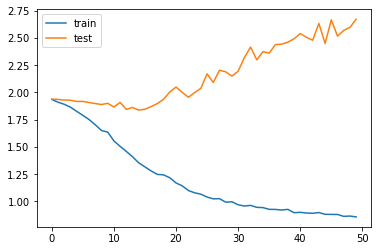

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Now we can encode the data into a compressed version
X_train_encoded_lstm = model.predict(X_train_ohe, verbose=0)
X_test_encoded_lstm = model.predict(X_test_ohe, verbose=0)
X_val_encoded_lstm = model.predict(X_val_ohe, verbose=0)

# Test LSTM autoencoder-transformed data on CNN-LSTM model

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout, Conv1D, LeakyReLU
from keras.layers import Input, LSTM
from keras.models import Model

def network_CNN_LSTM(X_train,y_train):
    im_shape=(4000,5)
    inputs_cnn_lstm=Input(shape=(im_shape), name='inputs_cnn_lstm')
    
    conv1_1=Convolution1D(32, 6, activation='relu', input_shape=im_shape)(inputs_cnn_lstm)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    drop = Dropout(0.2)
    conv2_1=Convolution1D(16, 3, activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    drop = Dropout(0.2)
    lstm = (LSTM(units=64, name='lstm'))(pool2)
    flatten=Flatten()(lstm)
    dense_end1 = Dense(32, activation='relu')(flatten)
    drop = Dropout(0.2)
    dense_end2 = Dense(16, activation='relu')(dense_end1)
    main_output = Dense(7, activation='softmax', name='main_output')(dense_end2)

    
    model = Model(inputs=inputs_cnn_lstm, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    return(model)

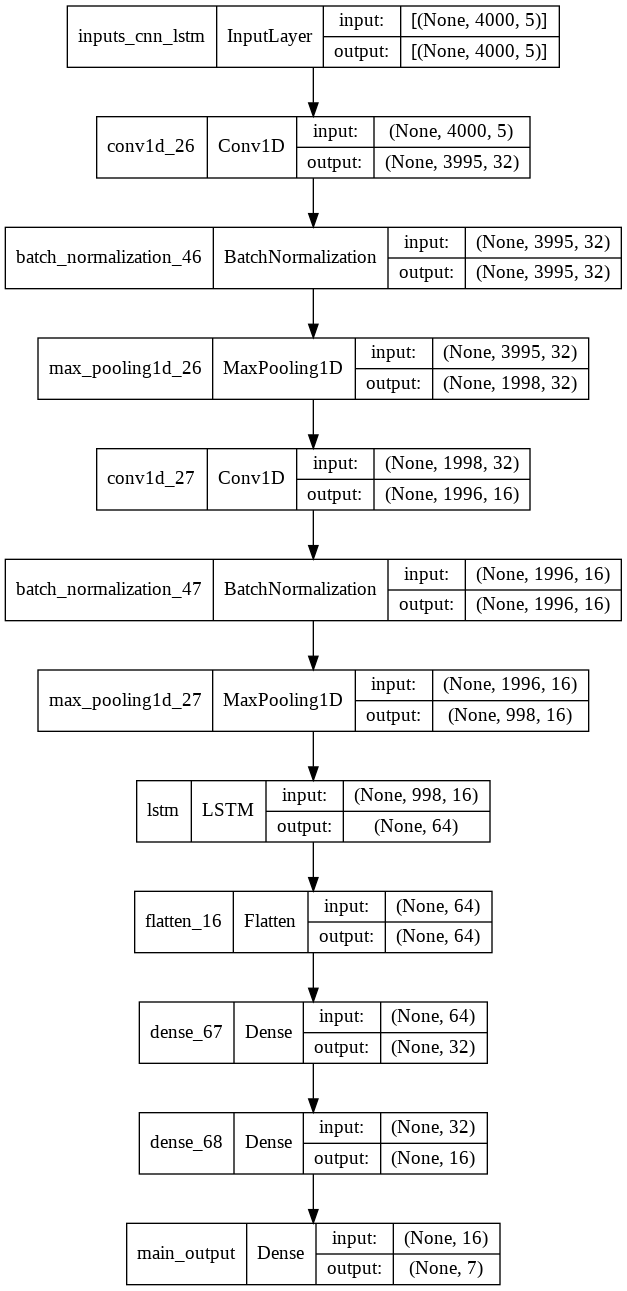

In [ ]:
model_3=network_CNN_LSTM(X_train_encoded_lstm,y_train_ohe)
plot_model(model_3, 'CNN-LSTM.png', show_shapes=True)

In [ ]:
history_3 = model_3.fit(X_train_encoded_lstm,y_train_ohe,epochs=50, batch_size=64, validation_data=(X_val_encoded_lstm,y_val_ohe))

Epoch 1/50
22/22 [==============================] - 10s 255ms/step - loss: 1.9431 - accuracy: 0.1372 - val_loss: 1.9452 - val_accuracy: 0.1207
Epoch 2/50
22/22 [==============================] - 3s 154ms/step - loss: 1.9148 - accuracy: 0.1631 - val_loss: 1.9452 - val_accuracy: 0.1207
Epoch 3/50
22/22 [==============================] - 3s 155ms/step - loss: 1.8977 - accuracy: 0.1724 - val_loss: 1.9520 - val_accuracy: 0.1782
Epoch 4/50
22/22 [==============================] - 3s 153ms/step - loss: 1.8884 - accuracy: 0.2148 - val_loss: 1.9530 - val_accuracy: 0.1667
Epoch 5/50
22/22 [==============================] - 3s 150ms/step - loss: 1.8895 - accuracy: 0.2126 - val_loss: 1.9618 - val_accuracy: 0.1552
Epoch 6/50
22/22 [==============================] - 3s 148ms/step - loss: 1.8816 - accuracy: 0.2177 - val_loss: 1.9677 - val_accuracy: 0.1552
Epoch 7/50
22/22 [==============================] - 3s 149ms/step - loss: 1.8686 - accuracy: 0.2234 - val_loss: 1.9707 - val_accuracy: 0.1494
Epoch

## Accuracy
The accuracy of LSTM autoencoder-transformed data on the same CNN-LSTM structure is very low. This could be due to several reasons. 

Accuracy: 15.52%


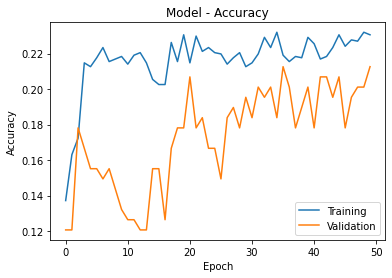

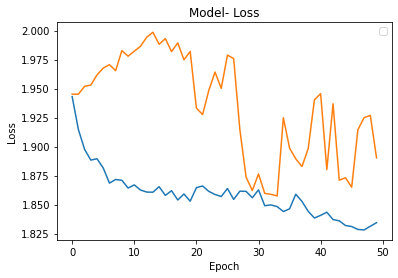

In [ ]:
# plot accuracy and loss
evaluate_model(history_3, X_test_encoded_lstm, y_test_ohe, model_3)
y_pred=model_3.predict(X_test_encoded_lstm)

## AUCROC Score

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_ohe, y_pred, multi_class='ovo', average='weighted')

0.543075783788516

## Confusion Matrix and F1 Score

In [ ]:
# convert the probabilities for each of the 7 classes in y_pred to the class with the highest proba
index = 0
y_pred_ = []

for i in y_pred:
  y_pred_.append(np.argmax(i))
  index+=1

'Cytoplasm' = 0, 'Cytosol' = 1, 'Nucleus' = 2, 'Ribosome' = 3, 'chromatin' = 4, 'nucleolus' = 5, 'nucleoplasm' = 6

The i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class. True values corresponds to the y-axis, prediction corresponds to the x-axis.

In [ ]:
cm = confusion_matrix(y_test, y_pred_)
cm

array([[ 3,  5,  3,  0,  0,  0, 11],
       [ 9,  4,  2,  0,  0,  0,  7],
       [ 5,  1,  1,  0,  2,  0, 12],
       [ 2,  5,  2,  0,  3,  0, 14],
       [ 4,  6,  3,  0,  1,  0, 16],
       [ 2,  5,  1,  0,  3,  0, 10],
       [ 5,  5,  3,  0,  1,  0, 18]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_, average='weighted')

0.10417174093166284

# Autoencoder model 3: Convolutional autoencoder


In [ ]:
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Dense, Conv1D, Dropout, BatchNormalization, Input, Reshape, Flatten, Conv1DTranspose, MaxPooling1D, UpSampling1D
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.utils import plot_model


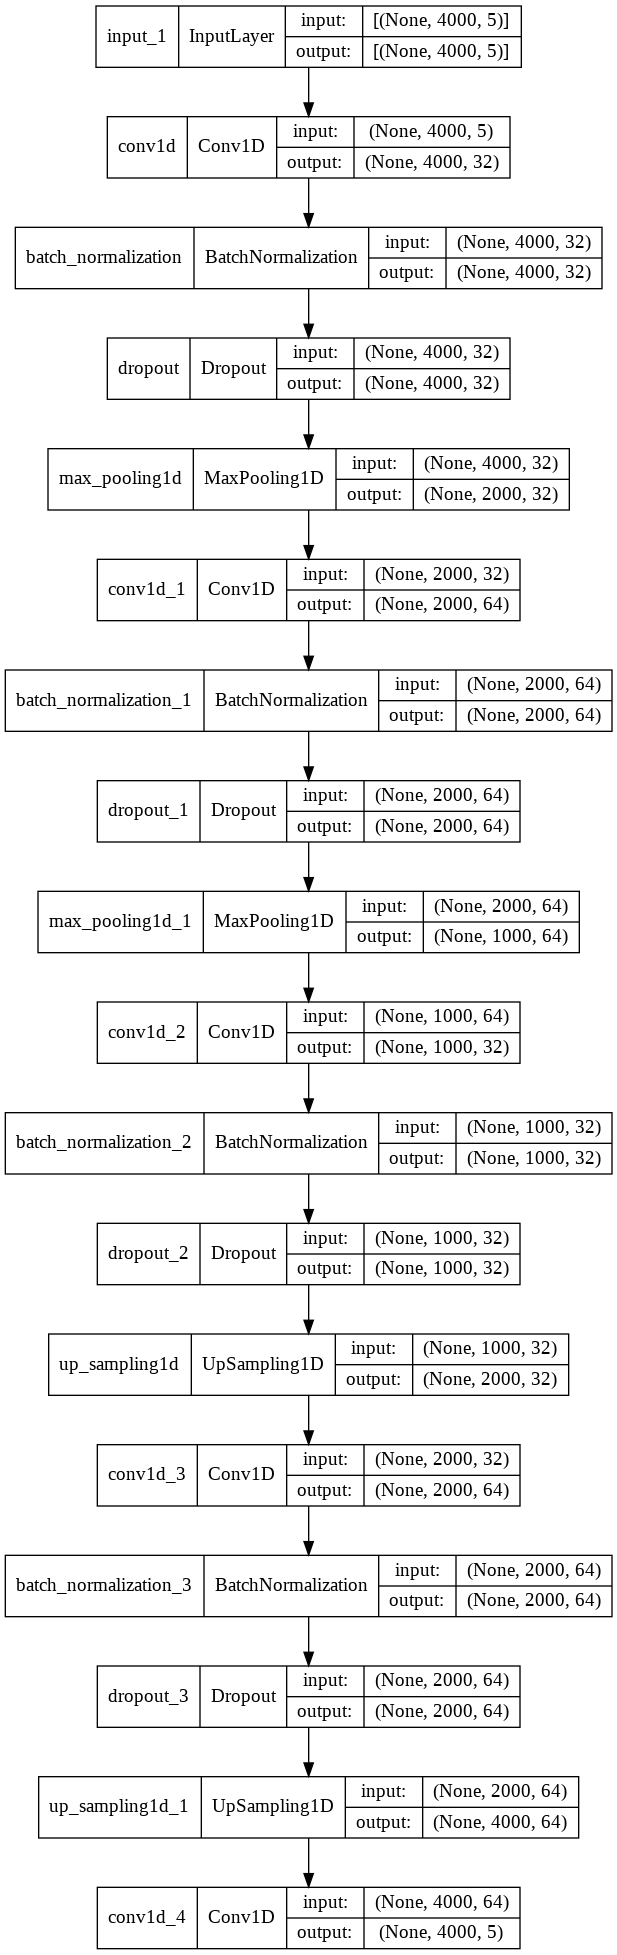

In [ ]:
# define encoder
input_window = Input(shape=(4000,5))
x = Conv1D(32, 6, activation="relu", padding="same")(input_window)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = MaxPooling1D(2, padding="same")(x)
x = Conv1D(64, 6, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

encoded = MaxPooling1D(2, padding="same")(x)
encoder = Model(input_window, encoded)

# define decoder
x = Conv1D(32, 6, activation="relu", padding="same")(encoded)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = UpSampling1D(2)(x)
x = Conv1D(64, 1, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = UpSampling1D(2)(x)
decoded = Conv1D(5, 6, activation='sigmoid', padding='same')(x) 
autoencoder = Model(input_window, decoded)
plot_model(autoencoder, show_shapes=True, to_file='CNN_autoencoder.png')


In [ ]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
history = autoencoder.fit(X_train_ohe, X_train_ohe,
                epochs=100,
                batch_size=64,
                verbose=2, 
                validation_data=(X_val_ohe, X_val_ohe))

Epoch 1/100
22/22 - 4s - loss: 0.5950 - accuracy: 0.7243 - val_loss: 0.5610 - val_accuracy: 0.7788 - 4s/epoch - 174ms/step
Epoch 2/100
22/22 - 3s - loss: 0.5925 - accuracy: 0.7250 - val_loss: 0.5553 - val_accuracy: 0.7801 - 3s/epoch - 146ms/step
Epoch 3/100
22/22 - 3s - loss: 0.5909 - accuracy: 0.7251 - val_loss: 0.5555 - val_accuracy: 0.7804 - 3s/epoch - 147ms/step
Epoch 4/100
22/22 - 3s - loss: 0.5890 - accuracy: 0.7256 - val_loss: 0.5494 - val_accuracy: 0.7813 - 3s/epoch - 149ms/step
Epoch 5/100
22/22 - 3s - loss: 0.5875 - accuracy: 0.7262 - val_loss: 0.5466 - val_accuracy: 0.7825 - 3s/epoch - 148ms/step
Epoch 6/100
22/22 - 3s - loss: 0.5854 - accuracy: 0.7263 - val_loss: 0.5432 - val_accuracy: 0.7828 - 3s/epoch - 148ms/step
Epoch 7/100
22/22 - 3s - loss: 0.5852 - accuracy: 0.7269 - val_loss: 0.5336 - val_accuracy: 0.7834 - 3s/epoch - 148ms/step
Epoch 8/100
22/22 - 3s - loss: 0.5819 - accuracy: 0.7276 - val_loss: 0.5365 - val_accuracy: 0.7839 - 3s/epoch - 148ms/step
Epoch 9/100
22/2

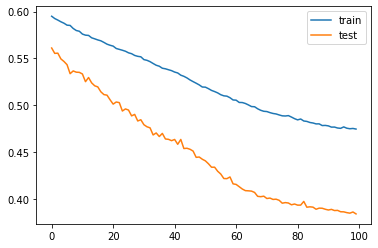

In [ ]:
from matplotlib.pyplot import *
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Now we can encode the data into a compressed version
X_train_encode_cnn = autoencoder.predict(X_train_ohe)
X_test_encode_cnn = autoencoder.predict(X_test_ohe)
X_val_encode_cnn = autoencoder.predict(X_val_ohe)

In [ ]:
autoencoder.save('autoencoder_CNN_default.h5')

# Test CNN autoencoder-transformed data on CNN-LSTM model 

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout, Conv1D, LeakyReLU
from keras.layers import Input, LSTM
from keras.models import Model

def network_CNN_LSTM(X_train,y_train):
    im_shape=(4000,5)
    inputs_cnn_lstm=Input(shape=(im_shape), name='inputs_cnn_lstm')
    
    conv1_1=Convolution1D(32, 6, activation='relu', input_shape=im_shape)(inputs_cnn_lstm)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    drop = Dropout(0.2)
    conv2_1=Convolution1D(16, 3, activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    drop = Dropout(0.2)
    lstm = (LSTM(units=64, name='lstm'))(pool2)
    flatten=Flatten()(lstm)
    dense_end1 = Dense(32, activation='relu')(flatten)
    drop = Dropout(0.2)
    dense_end2 = Dense(16, activation='relu')(dense_end1)
    main_output = Dense(7, activation='softmax', name='main_output')(dense_end2)

    
    model = Model(inputs=inputs_cnn_lstm, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    return(model)

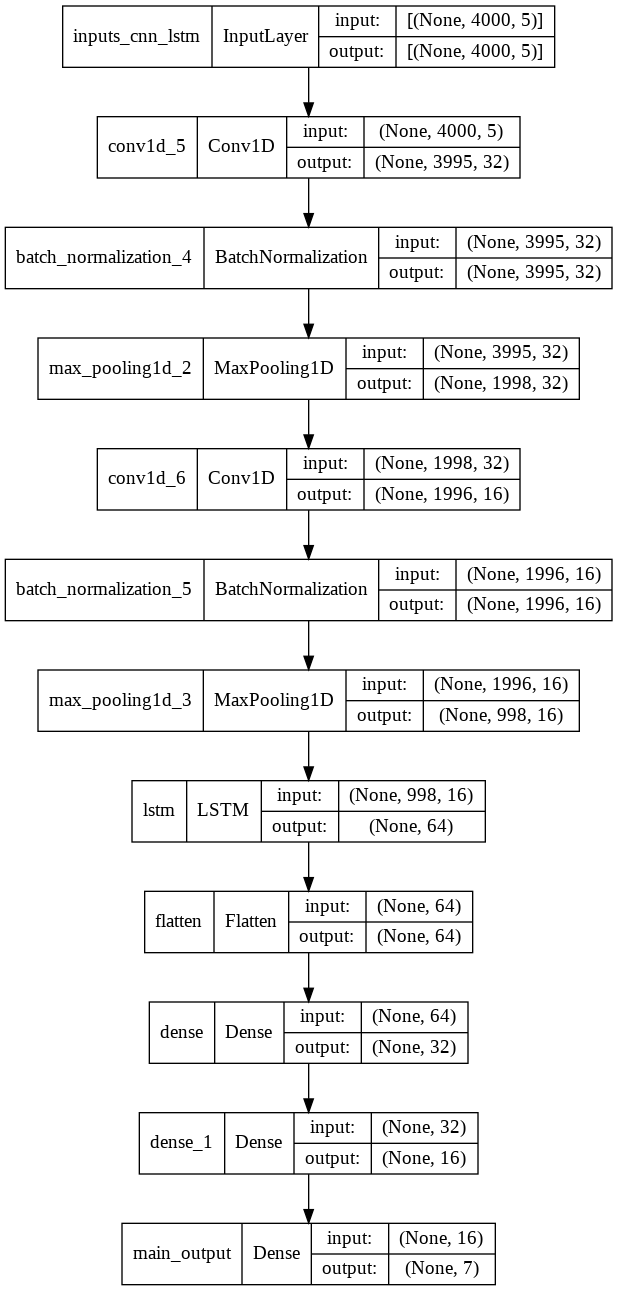

In [ ]:
model_4=network_CNN_LSTM(X_train_encode_cnn,y_train_ohe)
plot_model(model_4, 'CNN-LSTM.png', show_shapes=True)

In [ ]:
history_4 = model_4.fit(X_train_encode_cnn,y_train_ohe,epochs=60, batch_size=64, validation_data=(X_val_encode_cnn,y_val_ohe))

Epoch 1/60
22/22 [==============================] - 10s 218ms/step - loss: 1.9363 - accuracy: 0.1609 - val_loss: 1.9400 - val_accuracy: 0.1954
Epoch 2/60
22/22 [==============================] - 3s 158ms/step - loss: 1.8905 - accuracy: 0.2141 - val_loss: 1.9373 - val_accuracy: 0.1897
Epoch 3/60
22/22 [==============================] - 3s 153ms/step - loss: 1.8665 - accuracy: 0.2148 - val_loss: 1.9362 - val_accuracy: 0.1839
Epoch 4/60
22/22 [==============================] - 3s 152ms/step - loss: 1.8383 - accuracy: 0.2328 - val_loss: 1.9332 - val_accuracy: 0.1609
Epoch 5/60
22/22 [==============================] - 3s 152ms/step - loss: 1.8117 - accuracy: 0.2543 - val_loss: 1.9359 - val_accuracy: 0.1609
Epoch 6/60
22/22 [==============================] - 3s 152ms/step - loss: 1.7884 - accuracy: 0.2636 - val_loss: 1.9362 - val_accuracy: 0.1609
Epoch 7/60
22/22 [==============================] - 3s 153ms/step - loss: 1.7644 - accuracy: 0.2687 - val_loss: 1.9374 - val_accuracy: 0.1897
Epoch

## Accuracy

Accuracy: 27.01%


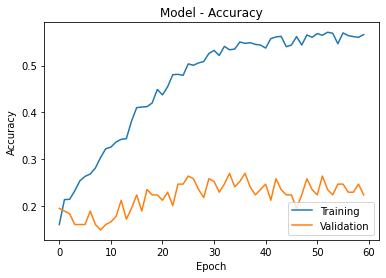

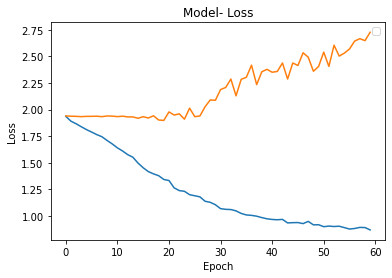

In [ ]:
# plot accuracy and loss
evaluate_model(history_4, X_test_encode_cnn, y_test_ohe, model_4)
y_pred=model_4.predict(X_test_encode_cnn)

## AUCROC Score

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_ohe, y_pred, multi_class='ovo', average='weighted')

0.6504044675591437

## Confusion Matrix and F1 Score

In [ ]:
# convert the probabilities for each of the 7 classes in y_pred to the class with the highest proba
index = 0
y_pred_ = []

for i in y_pred:
  y_pred_.append(np.argmax(i))
  index+=1

'Cytoplasm' = 0, 'Cytosol' = 1, 'Nucleus' = 2, 'Ribosome' = 3, 'chromatin' = 4, 'nucleolus' = 5, 'nucleoplasm' = 6

The i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class. True values corresponds to the y-axis, prediction corresponds to the x-axis.

In [ ]:
cm = confusion_matrix(y_test, y_pred_)
cm

array([[ 8,  1,  6,  6,  0,  0,  1],
       [ 0, 10,  1,  0,  7,  3,  1],
       [ 2,  2,  9,  0,  2,  2,  4],
       [ 3,  3,  3, 10,  2,  0,  5],
       [ 0,  5,  1,  4,  8,  3,  9],
       [ 0,  1,  2,  2,  8,  2,  6],
       [ 1,  6,  4,  5, 13,  3,  0]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_, average='weighted')

0.2629849587150638

In [ ]:
model_4.save('CNN-autoencoder+CNN+LSTM.h5')

In [ ]:
np.save('history_CNN-AE.npy', history_4)

INFO:tensorflow:Assets written to: ram://f8eabd13-68ba-4a00-9070-49a5bb7a8f5c/assets


INFO:tensorflow:Assets written to: ram://f8eabd13-68ba-4a00-9070-49a5bb7a8f5c/assets
